In [1]:
import pandas as pd
import numpy as np
import spacy
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os

In [2]:
text_folder="data\Text file"

In [3]:
# Load spaCy model
nlp = spacy.load("en_core_web_sm")

In [4]:
# Define a custom spaCy tokenizer
def spacy_tokenizer(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
    return tokens

In [5]:
# Function to read text from files based on file_id
def read_text_from_file(file_id):
    file_path=os.path.join(text_folder,f'{file_id}.txt')
    try:
        with open(file_path,'r',encoding='utf-8') as file:
            return file.read()
    except FileNotFoundError:
        return ''

In [6]:
data=pd.read_csv('data\Annotations_Metadata.csv')

In [7]:
data.head()

,file_id,user_id,subforum_id,num_contexts,label
0,12834217_1,572066,1346,0,noHate
1,12834217_2,572066,1346,0,noHate
2,12834217_3,572066,1346,0,noHate
3,12834217_4,572066,1346,0,hate
4,12834217_5,572066,1346,0,noHate


In [8]:
data['actual_text']=data['file_id'].apply(lambda file_id: read_text_from_file(file_id))

In [9]:
data.head()

,file_id,user_id,subforum_id,num_contexts,label,actual_text
0,12834217_1,572066,1346,0,noHate,"As of March 13th , 2014 , the booklet had been..."
1,12834217_2,572066,1346,0,noHate,In order to help increase the booklets downloa...
2,12834217_3,572066,1346,0,noHate,( Simply copy and paste the following text int...
3,12834217_4,572066,1346,0,hate,Click below for a FREE download of a colorfull...
4,12834217_5,572066,1346,0,noHate,Click on the `` DOWNLOAD ( 7.42 MB ) '' green ...


In [10]:
# preprocess and tokenize the text
data['preprocessed_text']=data['actual_text'].apply(lambda text:' '.join(spacy_tokenizer(text)))

In [11]:
data.head()

,file_id,user_id,subforum_id,num_contexts,label,actual_text,preprocessed_text
0,12834217_1,572066,1346,0,noHate,"As of March 13th , 2014 , the booklet had been...",March booklet download time counting
1,12834217_2,572066,1346,0,noHate,In order to help increase the booklets downloa...,order help increase booklet download great sto...
2,12834217_3,572066,1346,0,noHate,( Simply copy and paste the following text int...,simply copy paste following text YouTube video...
3,12834217_4,572066,1346,0,hate,Click below for a FREE download of a colorfull...,click free download colorfully illustrate page...
4,12834217_5,572066,1346,0,noHate,Click on the `` DOWNLOAD ( 7.42 MB ) '' green ...,click DOWNLOAD mb green banner link


In [12]:
# Remove rows where preprocessed_data is an empty string
data=data[data['preprocessed_text']!='']

In [13]:
data.head()

,file_id,user_id,subforum_id,num_contexts,label,actual_text,preprocessed_text
0,12834217_1,572066,1346,0,noHate,"As of March 13th , 2014 , the booklet had been...",March booklet download time counting
1,12834217_2,572066,1346,0,noHate,In order to help increase the booklets downloa...,order help increase booklet download great sto...
2,12834217_3,572066,1346,0,noHate,( Simply copy and paste the following text int...,simply copy paste following text YouTube video...
3,12834217_4,572066,1346,0,hate,Click below for a FREE download of a colorfull...,click free download colorfully illustrate page...
4,12834217_5,572066,1346,0,noHate,Click on the `` DOWNLOAD ( 7.42 MB ) '' green ...,click DOWNLOAD mb green banner link


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10722 entries, 0 to 10942
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   file_id            10722 non-null  object
 1   user_id            10722 non-null  int64 
 2   subforum_id        10722 non-null  int64 
 3   num_contexts       10722 non-null  int64 
 4   label              10722 non-null  object
 5   actual_text        10722 non-null  object
 6   preprocessed_text  10722 non-null  object
dtypes: int64(3), object(4)
memory usage: 670.1+ KB


In [15]:
data['preprocessed_text'].isnull().any()

False

In [16]:
from textblob import TextBlob

# Apply sentiment analysis with TextBlob
data['sentiment'] = data['preprocessed_text'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [17]:
data.head()

,file_id,user_id,subforum_id,num_contexts,label,actual_text,preprocessed_text,sentiment
0,12834217_1,572066,1346,0,noHate,"As of March 13th , 2014 , the booklet had been...",March booklet download time counting,0.000000
1,12834217_2,572066,1346,0,noHate,In order to help increase the booklets downloa...,order help increase booklet download great sto...,0.800000
2,12834217_3,572066,1346,0,noHate,( Simply copy and paste the following text int...,simply copy paste following text YouTube video...,0.000000
3,12834217_4,572066,1346,0,hate,Click below for a FREE download of a colorfull...,click free download colorfully illustrate page...,0.233333
4,12834217_5,572066,1346,0,noHate,Click on the `` DOWNLOAD ( 7.42 MB ) '' green ...,click DOWNLOAD mb green banner link,-0.200000


In [18]:
# TF-IDF Vectorization
vectorizer=TfidfVectorizer(stop_words='english',max_features=5000)
X_tfidf=vectorizer.fit_transform(data['preprocessed_text'])

In [19]:
# Topic Modelling 
num_topics=8
lda=LatentDirichletAllocation(n_components=num_topics,random_state=42)
lda.fit(X_tfidf)

LatentDirichletAllocation(n_components=8, random_state=42)

In [20]:
# Visualize topics
for topic_idx,topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx + 1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print()

Topic #1:
['join', 'love', 'nice', 'agree', 'like', 'buy', 'black', 'year', 'white', 'old']

Topic #2:
['black', 'happen', 'work', 'school', 'post', 'kid', 'white', 'look', 'like', 'thank']

Topic #3:
['maybe', 'lol', 'black', 'country', 'like', 'fight', 'day', 'people', 'good', 'white']

Topic #4:
['new', 'negro', 'people', 'hate', 'right', 'exactly', 'link', 'white', 'great', 'youtube']

Topic #5:
['think', 'check', 'pretty', 'people', 'wow', 'like', 'place', 'white', 'problem', 'long']

Topic #6:
['truth', 'ask', 'good', 'wonder', 'people', 'hope', 'white', 'like', 'want', 'know']

Topic #7:
['yes', 'hear', 'idea', 'like', 'way', 'sf', 'hair', 'white', 'time', 'eye']

Topic #8:
['woman', 'live', 'child', 'thread', 'broadcast', 'black', 'youtube', 'like', 'think', 'white']



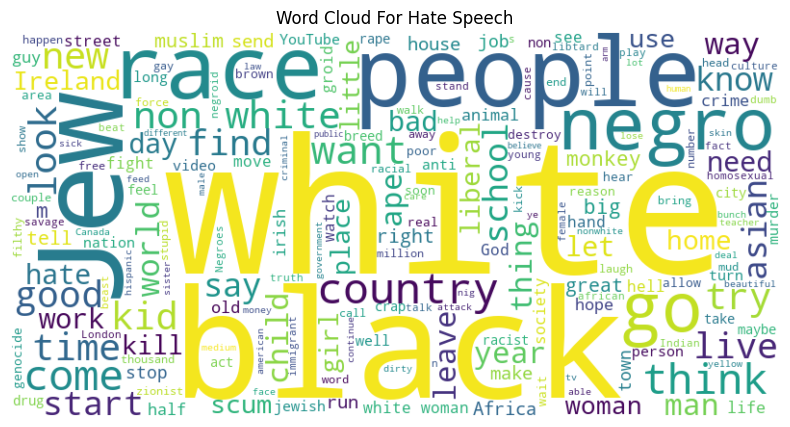

In [21]:
# wordcloud for the most frequent words in hate speech
hate_speech_wordcloud=WordCloud(
    width=800,
    height=400,
    background_color='white').generate(''.join(data[data['label']=='hate']['preprocessed_text']))

plt.figure(figsize=(10,5))
plt.imshow(hate_speech_wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud For Hate Speech')
plt.show()